# 3. Análisis exploratorio - Detección de noticias falsas

José Luis Aguilera Luzania

## Introducción

**¿Qué es la detección de *Fake News*?**
La detección de noticias falsas (Fake News) es la tarea de evaluar la veracidad de las afirmaciones en las noticias. Este es un problema crítico en el Procesamiento del Lenguaje Natural (PLN) porque tanto en medios de noticias tradicionales como en medios digitales las Fake News generan un gran impacto social y político en cada individuo. Por ejemplo, la exposición a las Fake News puede generar actitudes de ineficacia, alienación y cinismo hacia ciertos candidatos políticos (Balmas, 2014).

**Objetivo de la libreta**
El objetivo de esta libreta es conocer mejor los datos, no solo su estructura, sino su comportamiento y características que sean útiles.

## Librerías y datos

**Librerías**
- Manipulación de datos:
    - `pandas`: Librería para manipular los datos de forma tabular.
    - `matplotlib`: Librería para graficar.
    - `cmd`: Librería para controlar el formato de impresión en la consola.
    - `re`: Librería para utilizar expresiones regulares.
    
- Procesamiento del lenguaje natural:
    - `nltk`: Librería para utilizar técnicas de procesamiento del lenguaje natural.
    
- Representación de los datos:
    - `wordcloud`: Librería para generar una nube de palabras y guardarla como imagen *.png*.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cmd
import nltk

from nltk.corpus import stopwords
from wordcloud import WordCloud

### Datos adicionales para la librería `nltk`
- `punkt`: Necesario para utilizar el tokenizador de los textos.
- `stopwords`: Palabras comunes que no añaden información, como: el, la, los, etc.

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JoseLuis_AL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JoseLuis_AL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Leer los datos

Los datos procesados se encuentran en el archivo `datos.csv`.

In [3]:
df_datos = pd.read_csv('Datos/datos.csv')
df_datos.head()

,Categoria,Tema,Fuente,Encabezado,Texto
0,falsa,educación,el ruinaversal,rae incluira la palabra lady en el diccionario...,rae incluira la palabra lady en el diccionario...
1,falsa,educación,hay noticia,la palabra haiga aceptada por la rae,la palabra haiga aceptada por la rae la real a...
2,falsa,educación,el ruinaversal,yordi rosado escribira y disenara los nuevos l...,yordi rosado escribira y disenara los nuevos l...
3,verdadera,educación,el universal,unam capacitara a maestros para aprobar prueba...,unam capacitara a maestros para aprobar prueba...
4,falsa,educación,lamula,pretenden aprobar libros escolares con conteni...,alerta pretenden aprobar libros escolares con ...


### Información de los datos

In [4]:
print('Noticias verdaderas: {}'.format(df_datos.groupby('Categoria').size()[0]))
print('Noticias falsas: {}'    .format(df_datos.groupby('Categoria').size()[1]))
print(f'Todal de Noticias: {df_datos.shape[0]}')
print(f'Columnas: {list(df_datos.columns)}')

Noticias verdaderas: 338
Noticias falsas: 338
Todal de Noticias: 676
Columnas: ['Categoria', 'Tema', 'Fuente', 'Encabezado', 'Texto']


## Análisis exploratorio

### Noticias según los temas

El *corpus* cuenta con 9 temas, para observar como se encuentran distribuidas las noticias según el tema es necesario hacer lo siguiente:

1. Contar todas las noticias y separarlas en un nuevo `DataFrame`.
2. Guardar el nuevo `DataFrame` en un archivo `.csv`.
3. Graficar el nuevo `DataFrame` utilizando un diagrama de barras.

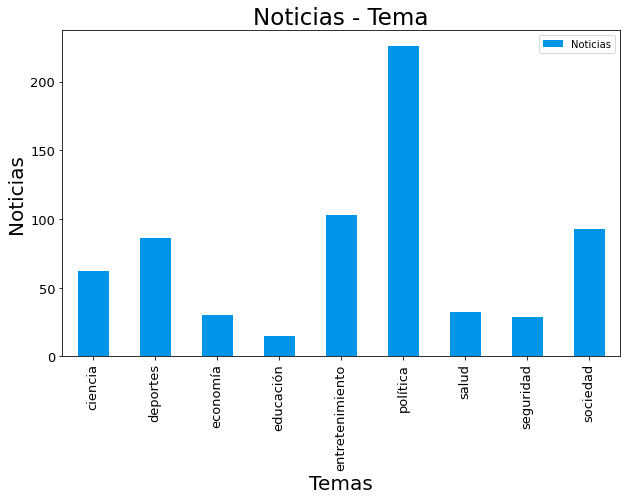

In [5]:
# Paso 1.
df_datos_temas = pd.DataFrame.from_dict(
    dict(df_datos.groupby('Tema').size()),
    orient='index',
    columns=['Noticias'])

# Paso 2.
df_datos_temas.to_csv('Tablas-CSV/Datos-Tabla-Noticias-Temas.csv')

# Paso 3.
color = '#0095e9'

temas_plot = df_datos_temas.plot(kind='bar', figsize=(10, 6), fontsize=13, color=[color])
temas_plot.set_title('Noticias - Tema', fontsize=23)
temas_plot.set_xlabel('Temas', fontsize=20)
temas_plot.set_ylabel('Noticias', fontsize=20)

temas_plot.figure.savefig('Plots/Figura-Datos-Noticias-Temas.png')

### ¿Cuáles son las fuentes?

Para conocer el número de fuentes e imprimir cada una de ellas es necesario hacer los siguiente:

1. Crear una lista con todas las fuentes.
2. Eliminar todas las fuentes repetidas.
3. Imprimir todas las fuentes.
4. Imprimir el número de fuentes.

In [6]:
#  Paso 1.
fuentes_ls = df_datos['Fuente'].to_list()

# Paso 2.
fuentes_ls = list(sorted(set(fuentes_ls)))

# Paso 3.
cli = cmd.Cmd()
cli.columnize(fuentes_ls, displaywidth=130)

# Paso 4.
print(f'\nNúmero de fuentes: {len(fuentes_ls)}')

20 minutos                 dos mundos                 exclusivas puebla        la vanguardia        radio formula          
abc                        eco portal                 expansion                la voz popular       razon                  
abc noticias               eje central                facebook el senor lopez  lamula               record                 
abc sociedad               el clarin                  facebook unico noticias  lo que calla la tv   resumen latinoamericano
alerta digital             el coleccionista de datos  fisgon politico          los replicantes      retroceso              
animal politico            el dizque                  forbes                   marca                rey misterios          
anonymous azteca           el economista              frentes politicos        medio tiempo         sabor a merengue       
argumento politico         el espectador              hay noticia              merca2 0             sdp noticias           
aristegu

### Tipos de noticias según los temas.

Para obtener la cantidad de las noticias falsas y verdaderas se deben seguir los siguientes pasos:

1. Separar las noticias con categoría verdadera.
2. Generar un diccionario de las noticias agrupadas por tema.
3. Generar un `DataFrame` a partir del diccionario.
4. Repetir los tres pasos anteriores para la categoría de noticias falsas.
5. Unir los dos `DataFrame` resultantes.
6. Graficar el `DataFrame` resultado.


Text(0, 0.5, 'Noticias')

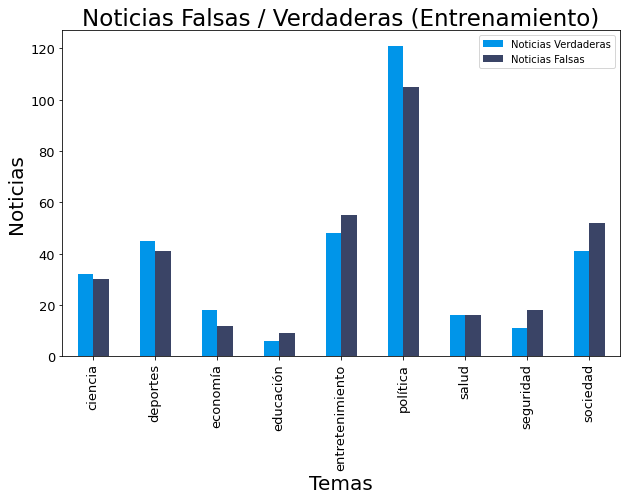

In [7]:
# CATEGORÍA: VERDADERAS.
# Paso 1.
df_verdaderas = df_datos[df_datos['Categoria'] == 'verdadera']

# Paso 2 y 3.
df_verdaderas = pd.DataFrame.from_dict(
    dict(
        df_verdaderas.groupby('Tema').size()),
        orient='index',
        columns=['Noticias Verdaderas'])

# CATEGORÍA: FALSAS.
# Paso 1.
df_falsas = df_datos[df_datos['Categoria'] == 'falsa']

# Paso 2 y 3.
df_falsas = pd.DataFrame.from_dict(
    dict(
        df_falsas.groupby('Tema').size()),
        orient='index',
        columns=['Noticias Falsas'])

# Paso 5.
df_total_noticias = pd.concat([df_verdaderas, df_falsas], axis=1)

# Paso 6.
color_verdaderas = '#0095e9'
color_falsas = '#3a4466'

total_noticias_plot = df_total_noticias.plot(kind='bar', figsize=(10, 6), fontsize=13, color=[color_verdaderas, color_falsas])
total_noticias_plot.set_title('Noticias Falsas / Verdaderas (Entrenamiento)', fontsize=23)
total_noticias_plot.set_xlabel('Temas', fontsize=20)
total_noticias_plot.set_ylabel('Noticias', fontsize=20)

## El sesgo de los datos.

Como se observa en la gráfica anterior, la cantidad de noticias sobre política es mayor a la cantidad de los otros temas, esto implica que nuestros modelos serán mejor clasificando noticias sobre política que de cualquier otro tema.

## Word Cloud

*Word Cloud* es una representación visual de las palabras que forman un texto, donde el tamaño es mayor para las palabras que aparecen con más frecuencia.

### Stopwords en español

Las *stopwords* o palabras vacías son aquellas que carecen de sentido de manera individual o sin una palabra clave o *keyword*. Algunos ejemplos son: el, la, ellos, ustedes, para, ser, etc.

Se utilizan las *stopwords* proporcionadas por la librería `nltk` en conjunto con las obtenidas del repositorio "stopwords-es" del usuario [genediazjr](https://github.com/stopwords-iso/stopwords-es)

In [8]:
# Obtener las stopwords.
stopwords_spanish_nltk = stopwords.words('spanish')
stopwords_spanish_json = list(pd.read_json('stopwords-es.json')[0])

# Se concatenan las stopwords, se crea un set para eliminar repetidos y sé genera una lista.
stopwords_spanish = list(set(stopwords_spanish_nltk+stopwords_spanish_json))

# Se agrega la stopword 'NUMBER', debido a que no aporta nada a los datos para el análisis.
stopwords_spanish.append('number')

### Función para generar *Word Cloud*

In [9]:
def generar_word_cloud(datos, nombre_archivo, stopwords_ls=None, categoria='todas', tema='todas'):
    """
    Input:
        datos: DataFrame que contiene las noticias.
        categoria: Categoría a utilizar para los datos (True o Fake).
        tema: Tema de las noticias.
        nombre_archivo: nombre del archivo donde se guardará la nube de palabras.
    """
    
    # Guardamos las noticias según la categoría.
    df = datos if categoria == 'todas' else datos[datos['Categoria'] == categoria]

    # Guardamos las noticias según el tema.
    if tema != 'todas': df = df[df['Tema'] == tema]

    # Removemos las columnas que no son necesarias.
    df = df[['Texto']]
    
    # Imprimiremos la información de los datos utilizados.
    print(f'NOTICIAS [{tema.upper()}] {categoria.upper()}S: {df.shape[0]}')

    # Generamos una lista con todos los textos.
    news_ls = [w for w in df['Texto']]

    # Generamos un objeto str con la lista de textos (concatenamos los textos).
    news_str = ' '.join(news_ls)
    
    # Crear un tokenizer que separe solo las palabras.
    tokenizer = nltk.RegexpTokenizer(r'\w+')

    # Tokenizar las palabras.
    words = tokenizer.tokenize(news_str)

    # Eliminar las stopwords.
    if stopwords_ls is None:
        stopwords_ls = []

    words_content = [w for w in words if w.lower() not in stopwords_ls]

    # Obtener la frequencia de las palabras de contenido sin las stopwords.
    words_content_freq = nltk.FreqDist(words_content)
    words_content_freq_dict = dict(words_content_freq)

    # Crear el word cloud.
    word_cloud = WordCloud(collocations = False, background_color = 'white', width=1000, height=1000).fit_words(words_content_freq_dict)

    # Guardarlo en un archivo.
    word_cloud.to_file(nombre_archivo);
    
    return None

### Generar *Word Cloud* para análisis del texto.

Se generan las *Word CLoud* para las siguientes noticias.

- Todas las noticias verdaderas de cualquier tema.
- Todas las noticias falsas de cualquier tema.

- Todas las noticias verdaderas del tema de entretenimiento.
- Todas las noticias falsas del tema de entretenimiento.

- Todas las noticias verdaderas del tema de salud.
- Todas las noticias falsas del tema de salud.

In [10]:
# Word Cloud de todas las noticias.
generar_word_cloud(df_datos, 'Word-Cloud/Word_Cloud_True_News.png', stopwords_spanish, 'verdadera', 'todas',)
generar_word_cloud(df_datos, 'Word-Cloud/Word_Cloud_Fake_News.png', stopwords_spanish, 'falsa', 'todas',)

# Word Cloud de las noticias de entretenimiento.
generar_word_cloud(df_datos, 'Word-Cloud/Word_Cloud_Entertainment_True_News.png', stopwords_spanish, 'verdadera', 'entretenimiento',)
generar_word_cloud(df_datos, 'Word-Cloud/Word_Cloud_Entertainment_Fake_News.png', stopwords_spanish, 'falsa', 'entretenimiento',)

# Word Cloud de las noticias de salud.
generar_word_cloud(df_datos, 'Word-Cloud/Word_Cloud_Health_True_News.png', stopwords_spanish, 'verdadera', 'salud',)
generar_word_cloud(df_datos, 'Word-Cloud/Word_Cloud_Health_Fake_News.png', stopwords_spanish, 'falsa', 'salud',)

NOTICIAS [TODAS] VERDADERAS: 338
NOTICIAS [TODAS] FALSAS: 338
NOTICIAS [ENTRETENIMIENTO] VERDADERAS: 48
NOTICIAS [ENTRETENIMIENTO] FALSAS: 55
NOTICIAS [SALUD] VERDADERAS: 16
NOTICIAS [SALUD] FALSAS: 16


<h3>Word Cloud de todas las noticias verdaderas</h3>
<img src="Word-Cloud/Word_Cloud_True_News.png" width="400" height="400">

<h3>Word Cloud de todas las noticias falsas</h3>
<img src="Word-Cloud/Word_Cloud_Fake_News.png" width="400" height="400">

<h3>Word Cloud de todas las noticias verdaderas sobre entretenimiento</h3>
<img src="Word-Cloud/Word_Cloud_Entertainment_True_News.png" width="400" height="400">

<h3>Word Cloud de todas las noticias falsas sobre entretenimiento</h3>
<img src="Word-Cloud/Word_Cloud_Entertainment_Fake_News.png" width="400" height="400">

<h3>Word Cloud de todas las noticias verdaderas sobre salud</h3>
<img src="Word-Cloud/Word_Cloud_Health_True_News.png" width="400" height="400">

<h3>Word Cloud de todas las noticias falsas sobre salud</h3>
<img src="Word-Cloud/Word_Cloud_Health_Fake_News.png" width="400" height="400">